In [27]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.colors as mcolors
import json
import seaborn as sns
import traceback
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import instance_level_calculate_correlations as corr

In [28]:
# load the correlations from the json files

corr_data_path = 'instance_level_correlations'
folders = ['Data2Text','Captioning','Dialogue','SUMM','MT/WMT15','MT/WMT16','MT/WMT17','MT/WMT18','MT/WMT19','MT/WMT20','MT/WMT21','TAC']
# folders = ['Dialogue']
files = {}
for folder in folders:
    files[folder] = [fn for fn in glob.glob(f'{corr_data_path}/{folder}/**/*.json',recursive=True)]

jsons =  {}
for folder in folders:
    for file in files[folder]:
        f = open(file)
        try:
            data = json.load(f)
        except Exception as e:
            print(e)
            print(file)
        parts = file.rsplit('_', 1)
        first_part = parts[0].replace(".json", "")
        second_part = parts[1].replace(".json", "")
        if first_part not in jsons:
            jsons[first_part] = {"file":first_part,"samples":[],"etas":[],"results":{}}
        jsons[first_part]["samples"].append(data["sample"])
        jsons[first_part]["etas"]=data["etas"]
        jsons[first_part]["file"]=data["file"]
        for t in data["results"]:
            if t not in jsons[first_part]["results"]:
                jsons[first_part]["results"][t] = {}
            for r in data["results"][t]:
                if r not in jsons[first_part]["results"][t]:
                    jsons[first_part]["results"][t][r] = {}
                for agg in data["results"][t][r]:
                    if agg not in jsons[first_part]["results"][t][r]:
                        jsons[first_part]["results"][t][r][agg] = []
                    jsons[first_part]["results"][t][r][agg]+=data["results"][t][r][agg]

In [29]:
# load the data from the csv files (usefull to get the number of systems and utterances)

data_path = 'final_df'
files = {}
for folder in folders:
    files[folder] = [fn for fn in glob.glob(f'{data_path}/{folder}/**/*.csv',recursive=True)]

dfs = {}
for folder in folders:
    for file in files[folder]:
        print(file)
        dfs[file] = corr.load_file(file)

final_df/Data2Text/WebNLG2017/instance_level/WebNLG2017.csv
final_df/Data2Text/WebNLG2020/instance_level/WebNLG2020_rdf2text_en.csv
final_df/Data2Text/WebNLG2020/instance_level/WebNLG2020_rdf2text_ru.csv
final_df/Captioning/Flickr_data.csv
final_df/Captioning/coco_data.csv
final_df/Dialogue/DIALOGUE_pc_data.csv
final_df/Dialogue/DIALOGUE_tc_data.csv
final_df/SUMM/SUMM.csv
final_df/MT/WMT15/newstest2015.en-fi.data.csv
final_df/MT/WMT15/newstest2015.en-de.data.csv
final_df/MT/WMT15/newstest2015.de-en.data.csv
final_df/MT/WMT15/newstest2015.ru-en.data.csv
final_df/MT/WMT15/newstest2015.cs-en.data.csv
final_df/MT/WMT15/newstest2015.en-cs.data.csv
final_df/MT/WMT15/newstest2015.en-ru.data.csv
final_df/MT/WMT15/newstest2015.fi-en.data.csv
final_df/MT/WMT16/newstest2016.de-en.data.csv
final_df/MT/WMT16/newstest2016.en-ro.data.csv
final_df/MT/WMT16/newstest2016.en-fi.data.csv
final_df/MT/WMT16/newstest2016.en-ru.data.csv
final_df/MT/WMT16/newstest2016.ru-en.data.csv
final_df/MT/WMT16/newstest2

instance_level_correlations/Data2Text/WebNLG2017/instance_level/WebNLG2017


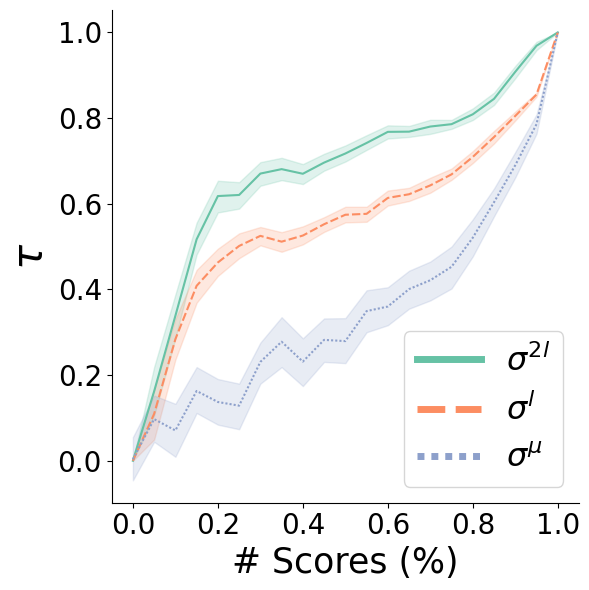

instance_level_correlations/Data2Text/WebNLG2020/instance_level/WebNLG2020_rdf2text_en


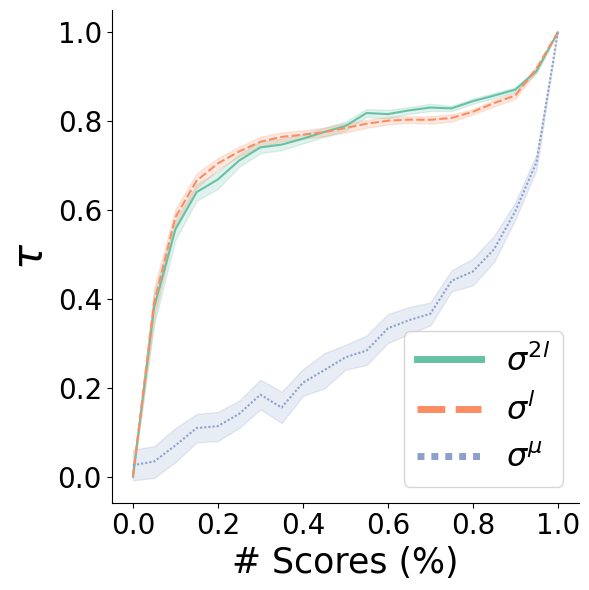

instance_level_correlations/Data2Text/WebNLG2020/instance_level/WebNLG2020_rdf2text_ru


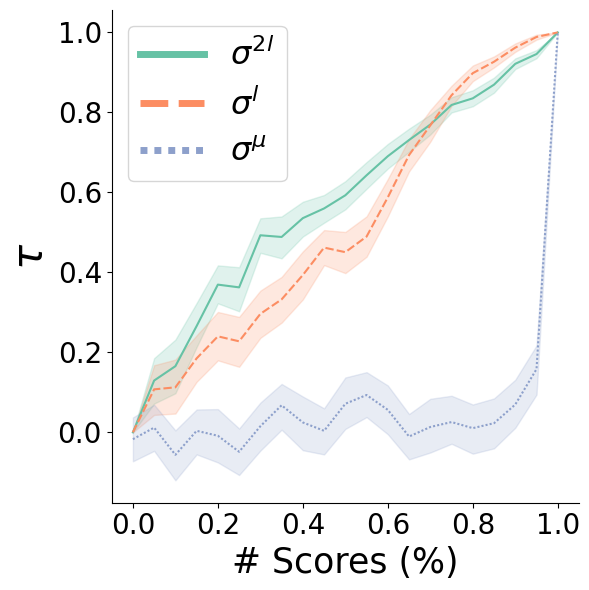

instance_level_correlations/Captioning/coco_data


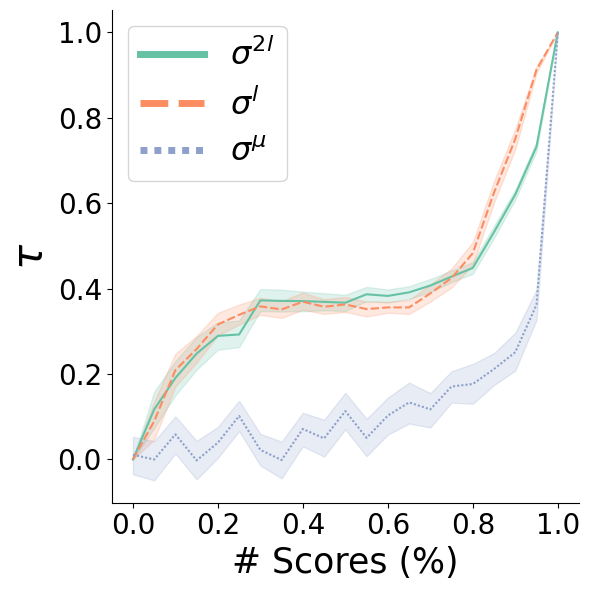

instance_level_correlations/Captioning/Flickr_data


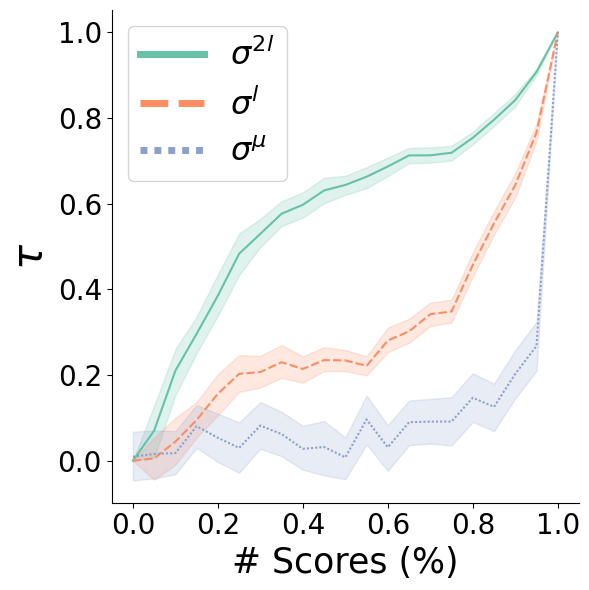

instance_level_correlations/Dialogue/DIALOGUE_tc_data


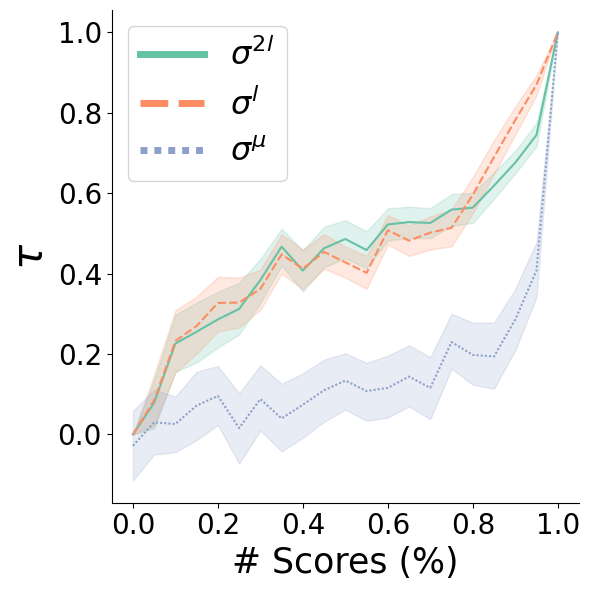

instance_level_correlations/Dialogue/DIALOGUE_pc_data


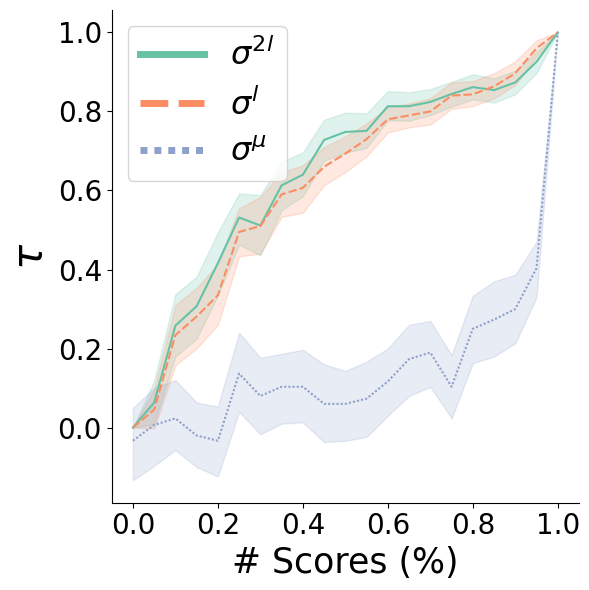

instance_level_correlations/SUMM/SUMM


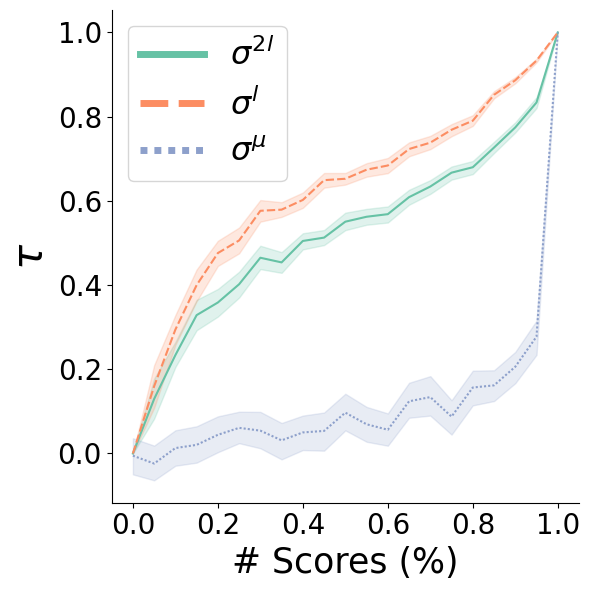

instance_level_correlations/MT/WMT21/newstest2021.cs-en.data


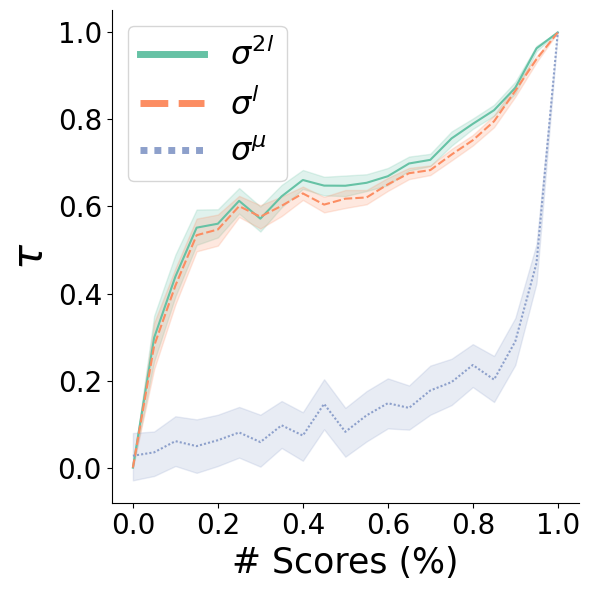

instance_level_correlations/MT/WMT21/florestest2021.bn-hi.data


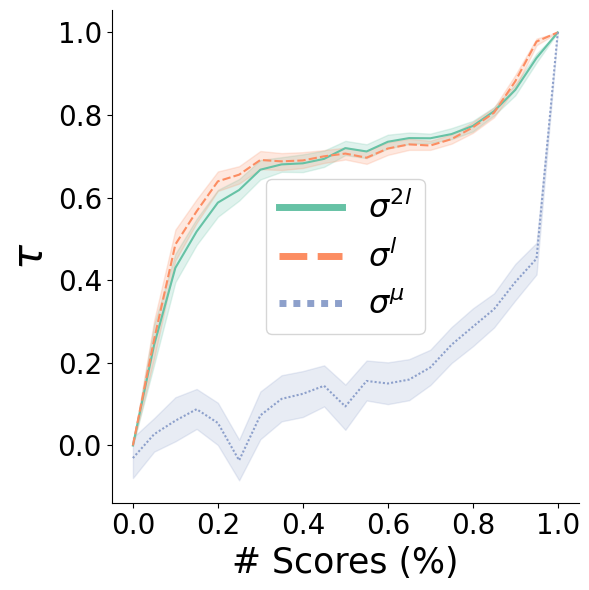

instance_level_correlations/MT/WMT21/tedtalks.zh-en.data


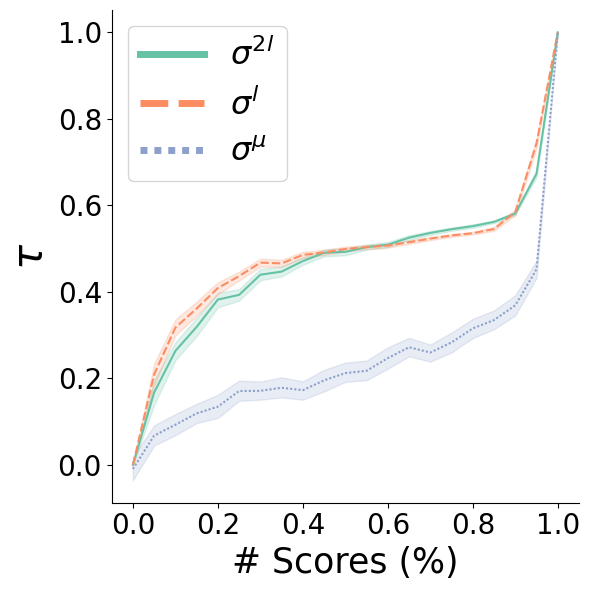

instance_level_correlations/MT/WMT21/newstest2021.zh-en.data


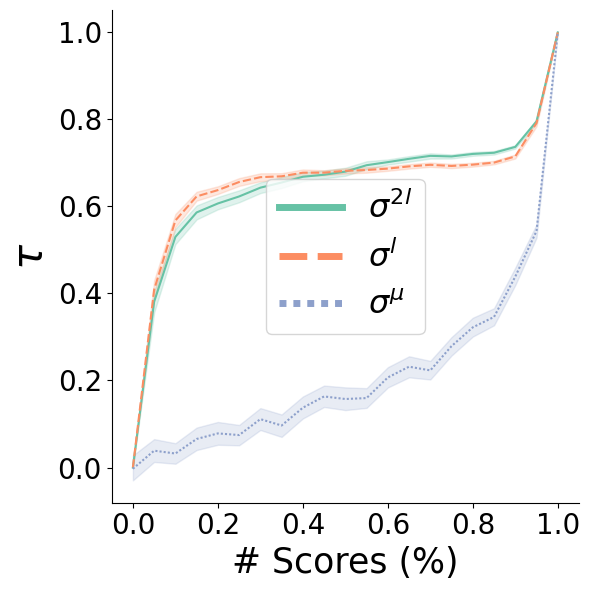

instance_level_correlations/MT/WMT21/newstest2021.en-is.data


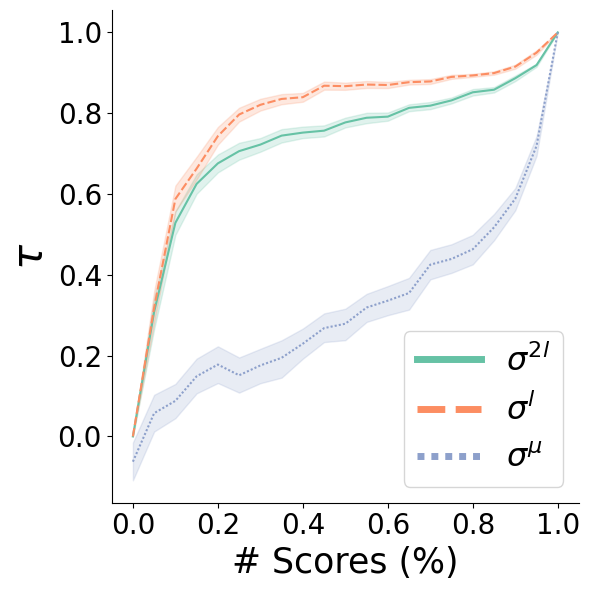

instance_level_correlations/MT/WMT21/newstest2021.fr-de.data


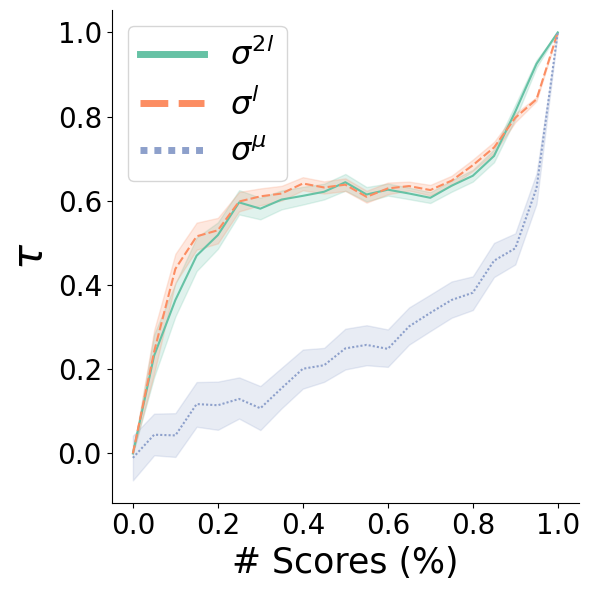

instance_level_correlations/MT/WMT21/challengeset.de-en.data


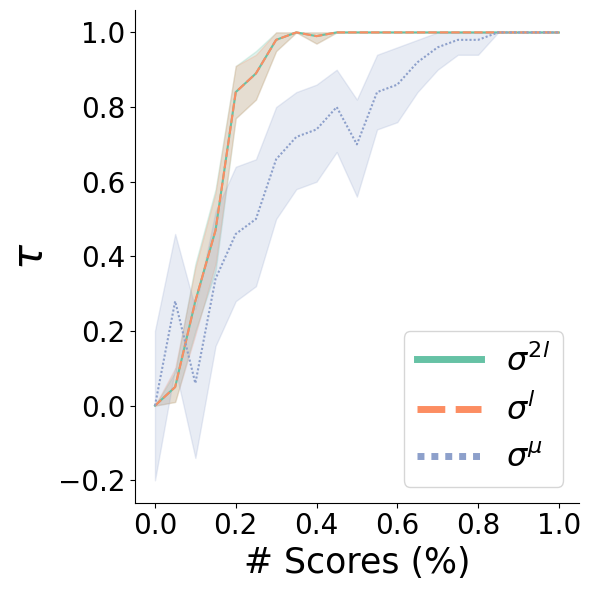

instance_level_correlations/MT/WMT21/florestest2021.zu-xh.data


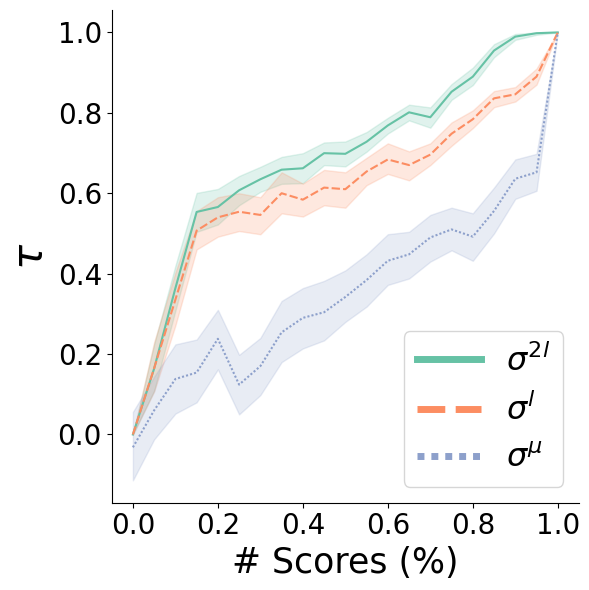

instance_level_correlations/MT/WMT21/newstest2021.is-en.data


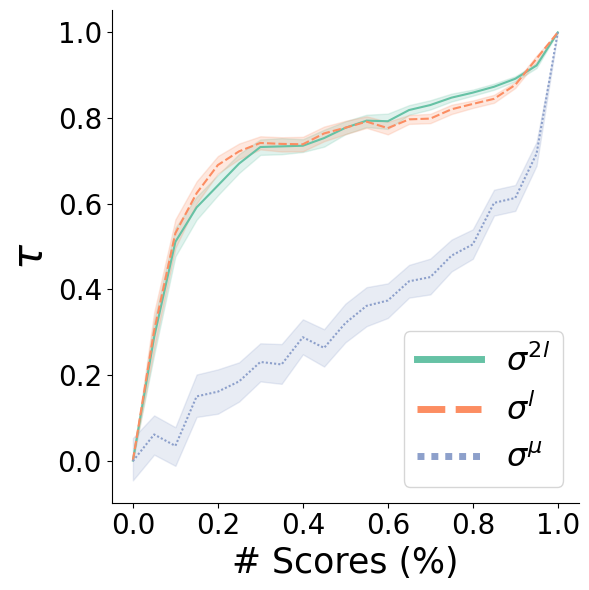

instance_level_correlations/MT/WMT21/newstest2021.de-fr.data


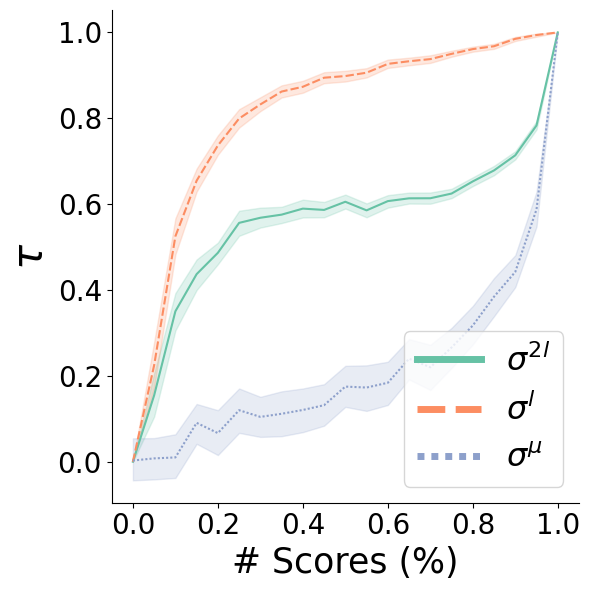

instance_level_correlations/MT/WMT21/tedtalks.en-ru.data


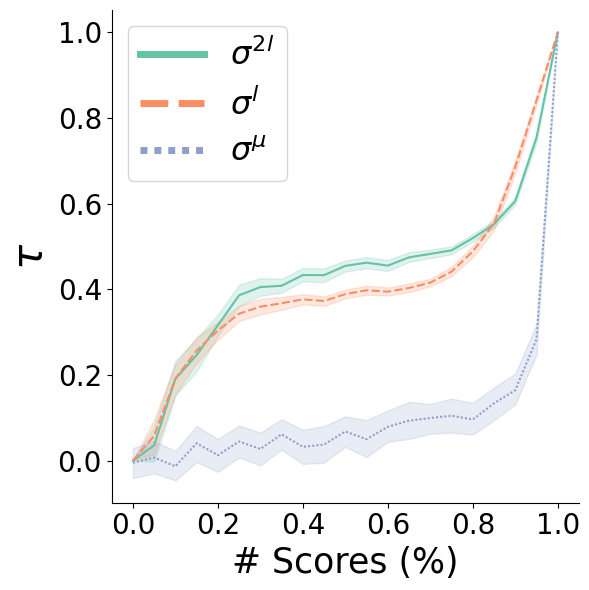

instance_level_correlations/MT/WMT21/newstest2021.en-de.data


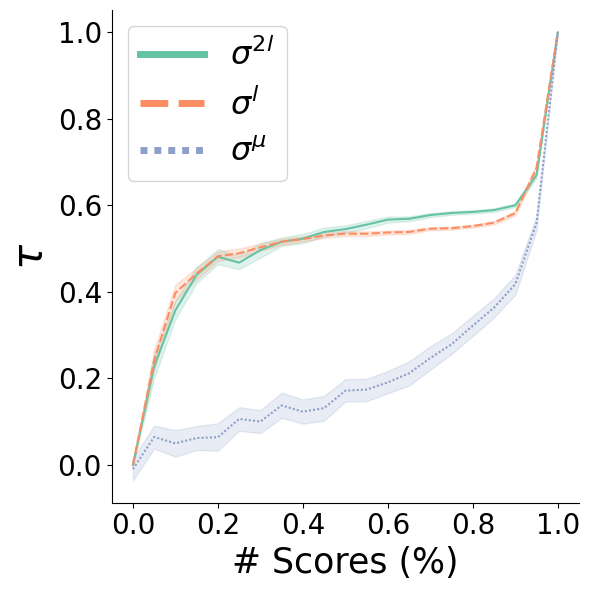

instance_level_correlations/MT/WMT21/newstest2021.ru-en.data


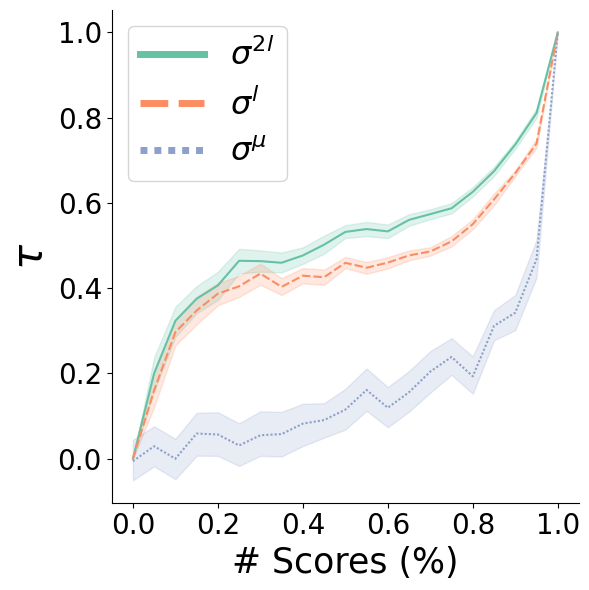

instance_level_correlations/MT/WMT21/florestest2021.hi-bn.data


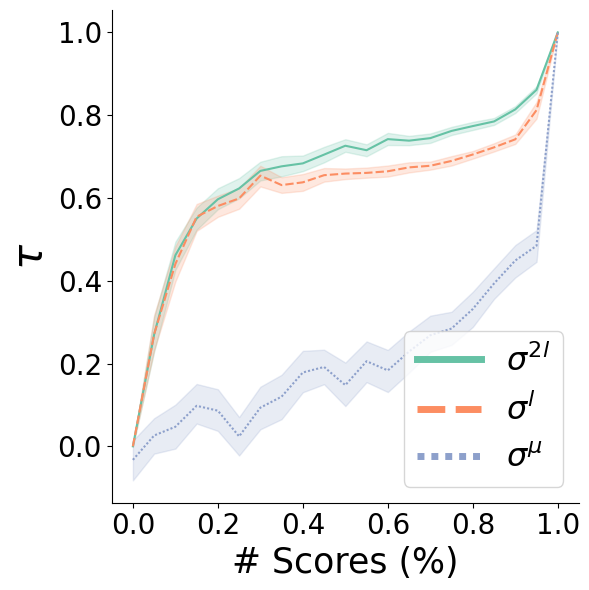

instance_level_correlations/MT/WMT21/newstest2021.en-ha.data


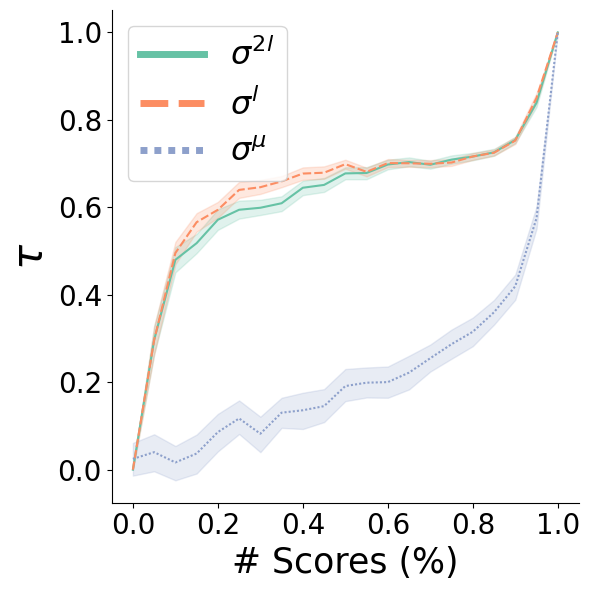

instance_level_correlations/MT/WMT21/newstest2021.en-cs.data


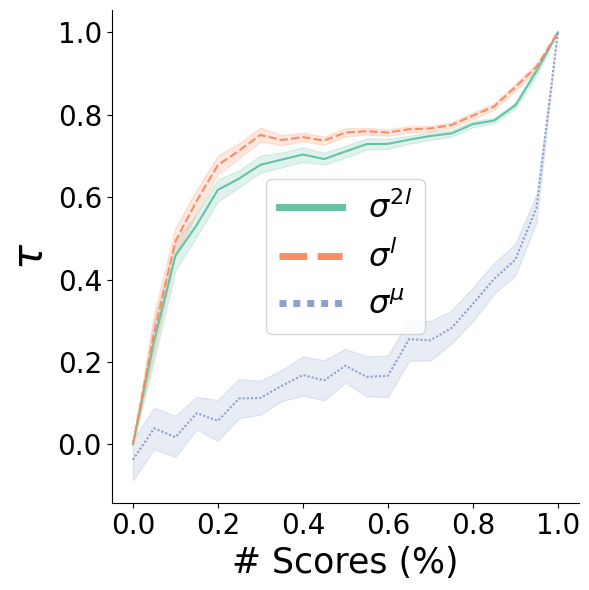

instance_level_correlations/MT/WMT21/challengeset.zh-en.data


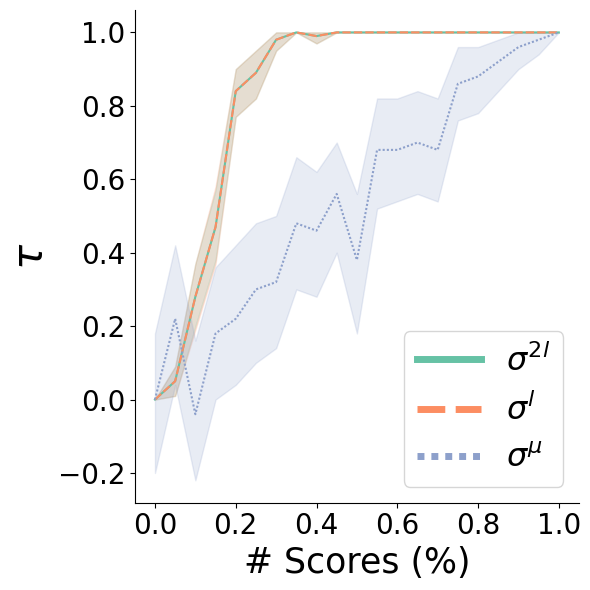

instance_level_correlations/MT/WMT21/florestest2021.xh-zu.data


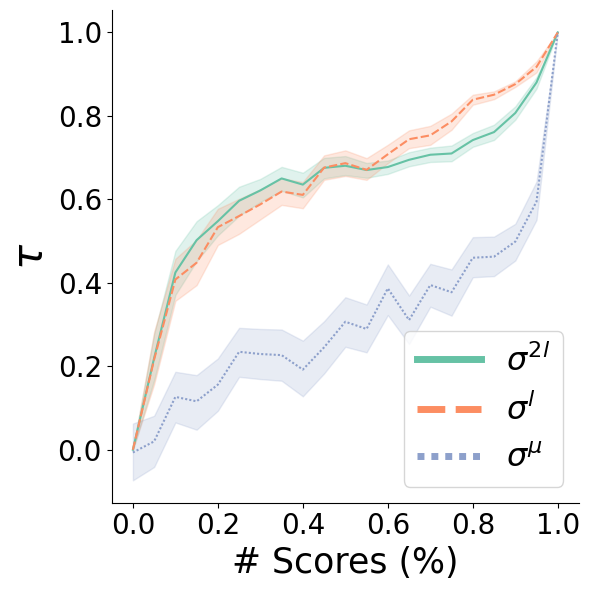

instance_level_correlations/MT/WMT21/tedtalks.en-de.data


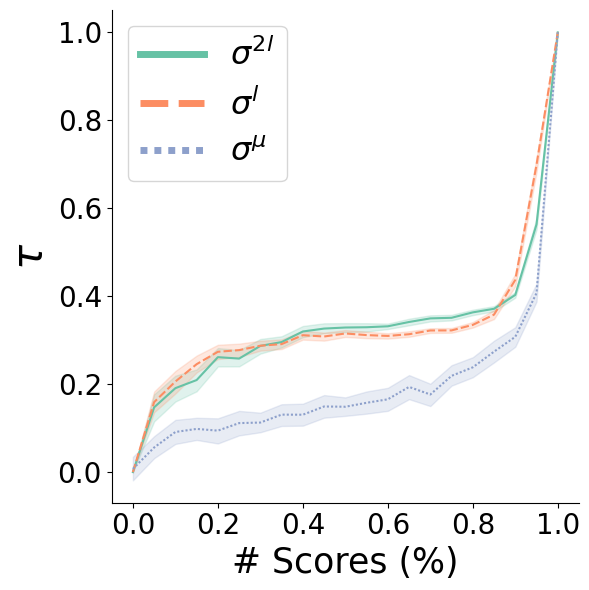

instance_level_correlations/MT/WMT21/newstest2021.ja-en.data


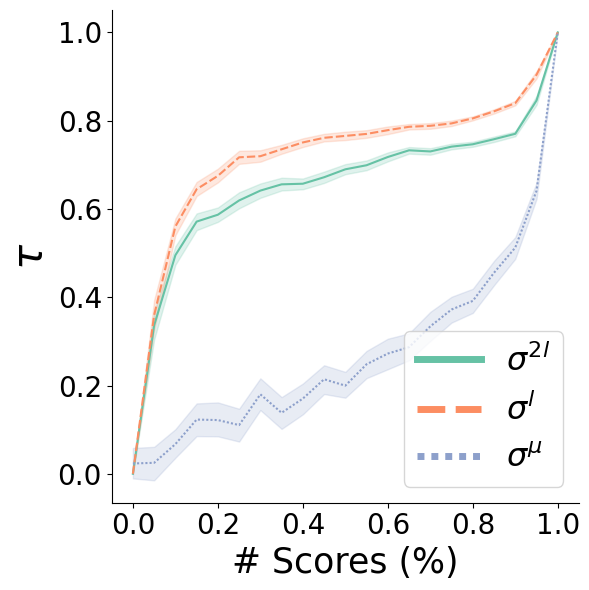

instance_level_correlations/MT/WMT21/newstest2021.en-ru.data


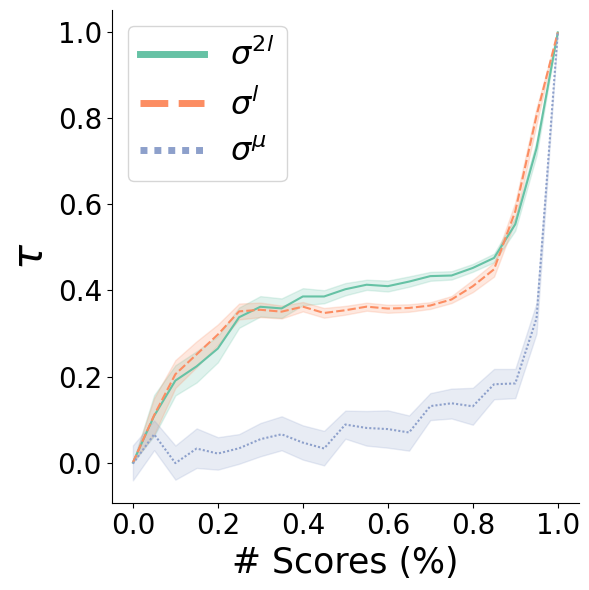

instance_level_correlations/MT/WMT21/newstest2021.ha-en.data


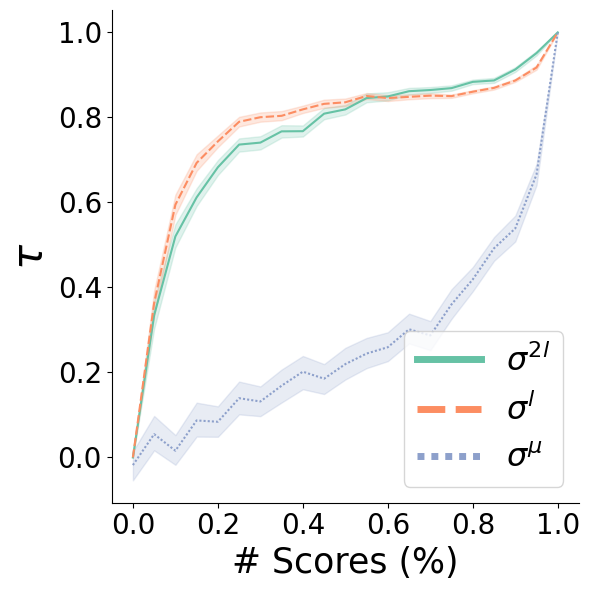

instance_level_correlations/MT/WMT21/challengeset.en-de.data


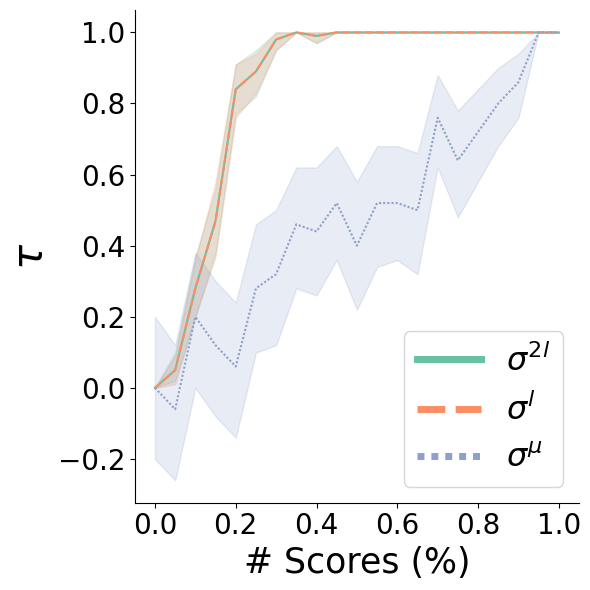

instance_level_correlations/TAC/TAC_11


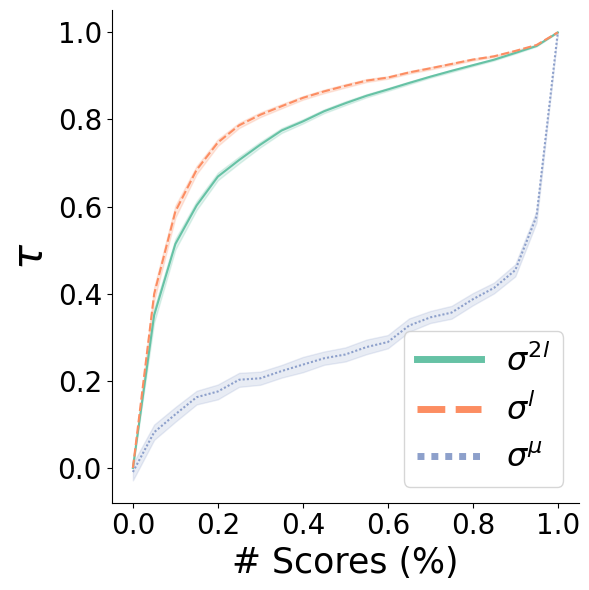

instance_level_correlations/TAC/TAC_08


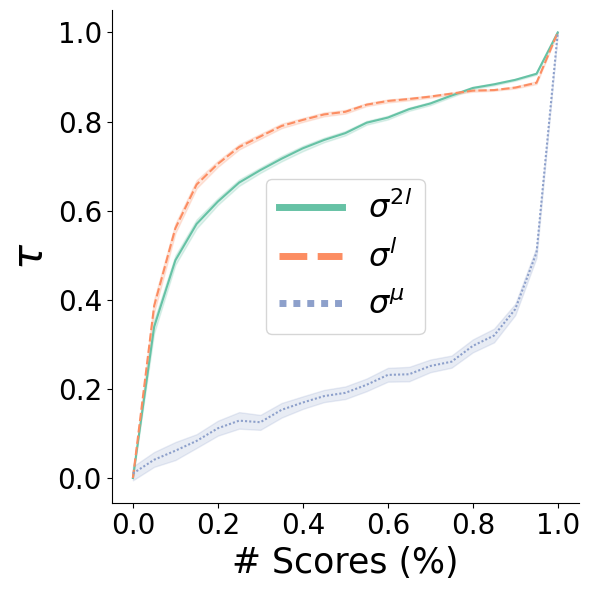

instance_level_correlations/TAC/TAC_09


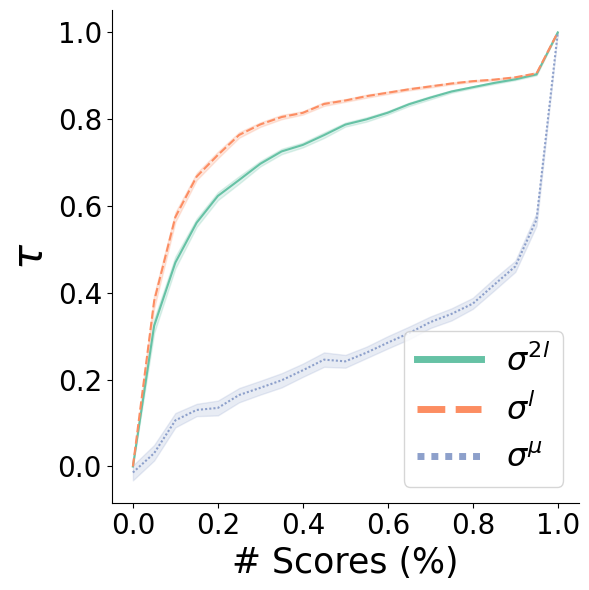

In [30]:
# plot the correlations

import matplotlib as mpl 
mpl.rcParams['axes.spines.right'] = False 
mpl.rcParams['axes.spines.top'] = False
for file in jsons:
    file_df = jsons[file]["file"]
    try:
        dfs_to_plot = {}
        for t in jsons[file]['results']:
            dfs_to_plot[t] = {}
            for r in jsons[file]['results'][t]:
                dfs_to_plot[t][r] = pd.DataFrame(jsons[file]['results'][t][r])
        # draw each removal in a horizontal subplot
        for t in dfs_to_plot:
            print(file)
            df_to_plot = dfs_to_plot[t][r]
            df_to_plot = df_to_plot.drop(columns=["seeds"])
            df_to_plot['eta'] = 1-np.array(jsons[file]['results'][t][r]["eta"])
            for k in df_to_plot:
                if k!="eta":
                    df_to_plot[k] = df_to_plot[k].map(lambda x: x["correlation"])
            df_to_plot.loc[df_to_plot['eta'] == 1, df_to_plot.columns != 'eta'] = 1
            df_to_plot = df_to_plot.fillna(0)
            df_to_plot = df_to_plot.drop(columns=["normalized_mean"])
            sns.set_palette("Set2")
            fig,ax = plt.subplots(figsize=(6,6))
            ax = sns.lineplot(x="eta", y="value",style='variable',hue='variable',data=pd.melt(df_to_plot, ['eta']))
            plt.yticks(fontsize=20) #hue="losses",
            plt.xticks(fontsize=20) #hue="losses",
            plt.ylabel('$\\tau$',fontsize=30)
            plt.xlabel('# Scores (%)',fontsize=25)
            plt.tight_layout()
            L=plt.legend(fontsize=23)
            for line in L.get_lines():
                line.set_linewidth(5.0)
            L.get_texts()[0].set_text('${\sigma}^{2l}$')
            L.get_texts()[1].set_text('${\sigma}^{l}$')
            L.get_texts()[2].set_text('${\sigma}^\mu$')

            # get filname from path
            filename = file.split(os.path.sep)[-1]
            # plot figure
            num_utterances = len(dfs[file_df].Utterance.unique())
            # fig.suptitle(filename+', systems:'+str(len(dfs[file_df]["System"].unique()))+', utterances:'+str(num_utterances))
            # save figure as png
            plt.savefig('instance_level_figures/two_level_{}.png'.format(file.split(os.path.sep)[-1]),format='png')
            plt.show()
            
    except Exception as e: 
        traceback.print_exc()

In [31]:
# Aggreement analysis
import scipy.stats as stats

# generate mean and std aggreement globally for all datasets
aggreements={}
for file in jsons:
    aggreements[file] = {"mean-two":[],"mean-one":[],"one-two":[]} # lists all aggreements
    j = jsons[file]
    for t in j["results"]:
        for r in j["results"][t]:
            for i in range(len(j["results"][t][r]["eta"])):
                if i!=len(j["results"][t][r]["eta"])-1:
                    aggreements[file]["mean-two"].append(stats.kendalltau(j["results"][t][r]["mean"][i]["ranking"],j["results"][t][r]["two_level"][i]["ranking"])[0])
                    aggreements[file]["mean-one"].append(stats.kendalltau(j["results"][t][r]["mean"][i]["ranking"],j["results"][t][r]["one_level"][i]["ranking"])[0])
                    aggreements[file]["one-two"].append(stats.kendalltau(j["results"][t][r]["one_level"][i]["ranking"],j["results"][t][r]["two_level"][i]["ranking"])[0])
    for k in aggreements[file]:
        # drop nans
        aggreements[file][k] = [0 if np.isnan(x) else x for x in aggreements[file][k]]


mean-two: 0.23 +- 0.36
mean-one: 0.24 +- 0.35
one-two: 0.81 +- 0.24


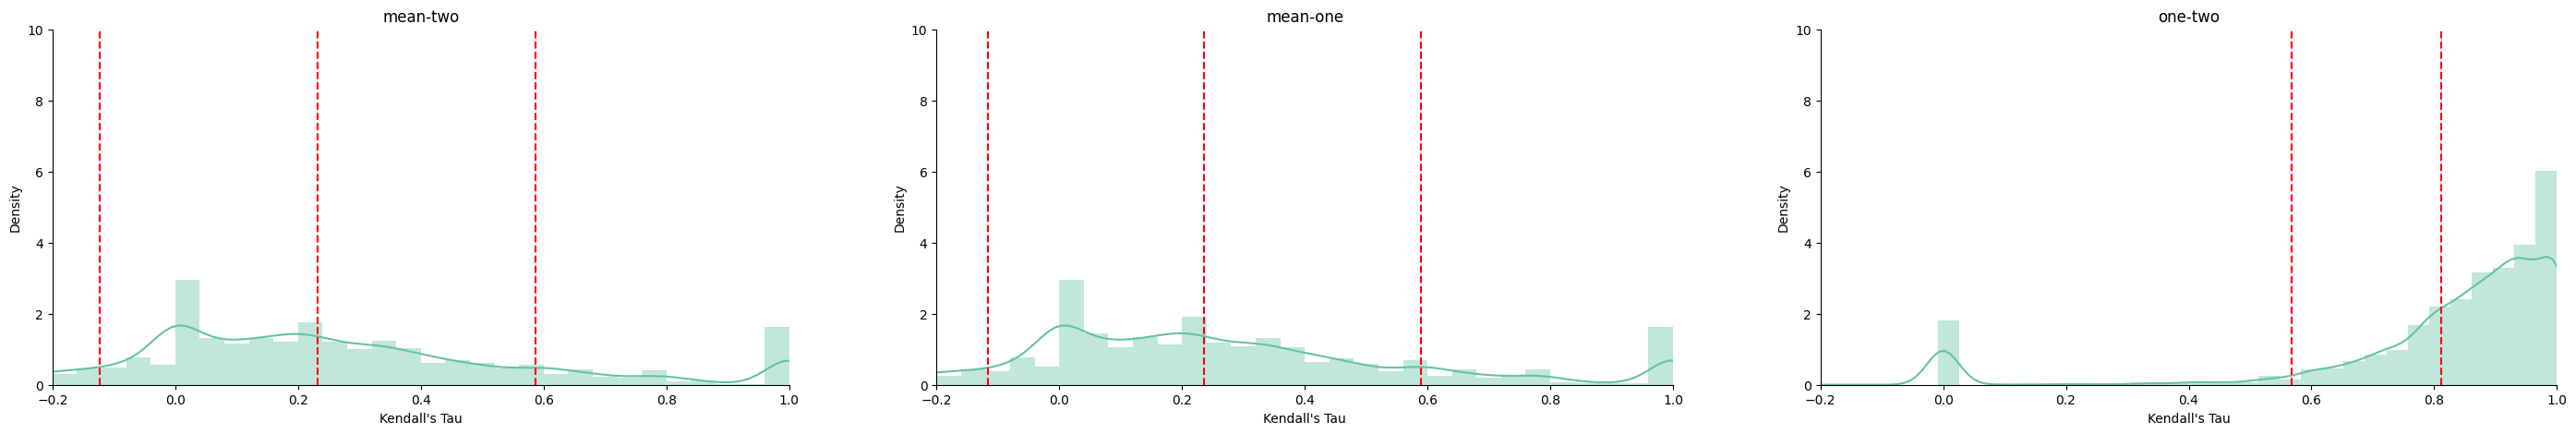

In [32]:
# generate mean and std aggreement globally for all datasets

global_aggreements = {"mean-two":[],"mean-one":[],"one-two":[]}
for file in aggreements:
    for k in aggreements[file]:
        global_aggreements[k].extend(aggreements[file][k])

# print mean and std aggreement globally for all datasets
print("mean-two: {:.2f} +- {:.2f}".format(np.mean(global_aggreements["mean-two"]),np.std(global_aggreements["mean-two"])))
print("mean-one: {:.2f} +- {:.2f}".format(np.mean(global_aggreements["mean-one"]),np.std(global_aggreements["mean-one"])))
print("one-two: {:.2f} +- {:.2f}".format(np.mean(global_aggreements["one-two"]),np.std(global_aggreements["one-two"])))

# scatterplot global aggreements
fig, axes = plt.subplots(1, len(global_aggreements), figsize=(35, 5))
for i, k in enumerate(global_aggreements):
    ax = sns.distplot(global_aggreements[k], ax=axes[i])
    axes[i].set_title(k)
    axes[i].set_ylim(0,10)
    axes[i].set_xlim(-0.2,1)
    axes[i].set_xlabel("Kendall's Tau")
    axes[i].set_ylabel("Density")
    axes[i].axvline(np.mean(global_aggreements[k]), color='r', linestyle='--')
    axes[i].axvline(np.mean(global_aggreements[k])+np.std(global_aggreements[k]), color='r', linestyle='--')
    axes[i].axvline(np.mean(global_aggreements[k])-np.std(global_aggreements[k]), color='r', linestyle='--')
    
plt.show()


In [33]:
# ratio of aggreement of the top k systems
k = 0 # best system
# k = 2 # third best system
counts = {"mean-two":0,"mean-one":0,"one-two":0} # number of times the best system is the same for each aggregation
c_double = 0
total = 0
for file in jsons:
    j = jsons[file]
    for t in j["results"]:
        for r in j["results"][t]:
            for i in range(len(j["results"][t][r]["eta"])):
                if i!=len(j["results"][t][r]["eta"])-1:
                    # get the indices of that are equal to k for each aggregation
                    mean_k = [x for x in range(len(j["results"][t][r]["mean"][i]["ranking"])) if j["results"][t][r]["mean"][i]["ranking"][x]==k]
                    one_k = [x for x in range(len(j["results"][t][r]["one_level"][i]["ranking"])) if j["results"][t][r]["one_level"][i]["ranking"][x]==k]
                    two_k = [x for x in range(len(j["results"][t][r]["two_level"][i]["ranking"])) if j["results"][t][r]["two_level"][i]["ranking"][x]==k]
                    if len(mean_k)==0 or len(one_k)==0 or len(two_k)==0:
                        c_double+=1
                    else:
                        if set(mean_k)==set(one_k):
                            counts["mean-one"]+=1
                        if set(mean_k)==set(two_k):
                            counts["mean-two"]+=1
                        if set(one_k)==set(two_k):
                            counts["one-two"]+=1
                    total+=1



In [34]:
print(c_double)
print(counts)
print(total)
for t in counts:
    print(t + " : " + str(counts[t]/total))

5873
{'mean-two': 14113, 'mean-one': 15774, 'one-two': 47914}
71360
mean-two : 0.1977718609865471
mean-one : 0.2210482062780269
one-two : 0.6714405829596413
